<h1 style="color:darkslategrey"> Seaborn trials 1 </h1>


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
### Example 0: datasets

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_diamond = sns.load_dataset('diamonds')
df_diamond
#df_diamond = df_diamond.sample(frac=1)
ordered_df_diamond = df_diamond.sort_values(by='color')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ordered_df_diamond)

       carat        cut color clarity  depth  table  price      x      y  \
53939   0.75      Ideal     D     SI2   62.2   55.0   2757   5.83   5.87   
7817    1.00  Very Good     D     SI2   63.5   59.0   4295   6.35   6.32   
7816    1.00       Good     D     SI2   57.8   58.0   4295   6.61   6.55   
7815    1.00  Very Good     D     SI2   61.5   63.0   4295   6.32   6.27   
7809    0.56      Ideal     D      IF   61.9   57.0   4293   5.28   5.31   
7804    0.90  Very Good     D     SI1   61.8   59.0   4291   6.13   6.16   
7793    0.90  Very Good     D     SI1   62.1   60.0   4289   6.11   6.19   
7791    0.71       Good     D     VS2   63.6   54.0   4289   5.70   5.75   
35459   0.43    Premium     D     VS2   59.7   59.0    901   4.89   4.93   
7769    0.81    Premium     D     VS1   62.3   58.0   4284   5.94   6.00   
35527   0.30      Ideal     D    VVS1   61.9   57.0    905   4.27   4.29   
7753    0.64      Ideal     D    VVS1   61.5   56.0   4281   5.57   5.59   
35585   0.35

In [6]:
y = ordered_df_diamond.iloc[0:16572,2].values #colors
print(y[6770:6776])

['D', 'D', 'D', 'D', 'D', 'E']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']


In [7]:
grouped_by_color = df_diamond.groupby('color')
for name, group in grouped_by_color:
    print(name)

D
E
F
G
H
I
J


In [9]:
y = np.where(y=='D', -1, 1)
xtemp = ordered_df_diamond.iloc[0:6775, 0:5]
X = ordered_df_diamond.iloc[0:16572, 0:5].values
xt = xtemp.pop('color')
xtemp['color'] = xt
#print(xtemp.tail())
#print(X)
print(X[:6775,0])

[0.75 1.0 1.0 ... 0.73 0.7 0.3]


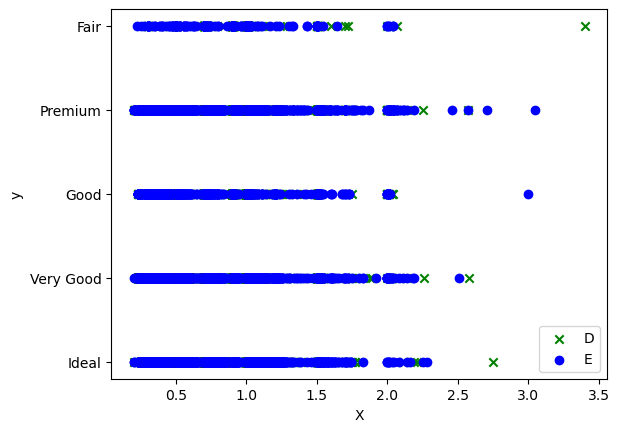

In [12]:
plt.scatter(X[:6775,0], X[:6775,1], color='green', marker='x', label='D')
plt.scatter(X[6775:,0], X[6775:,1], color='blue', marker='o', label='E')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='lower right') 
plt.show()

Recap: matplotlib Legend position <br>
Supported values: <br> 
'best', 'upper right', 'upper left', 'lower left', 'lower right', 
'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

### Example 1: pairplot

In [2]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

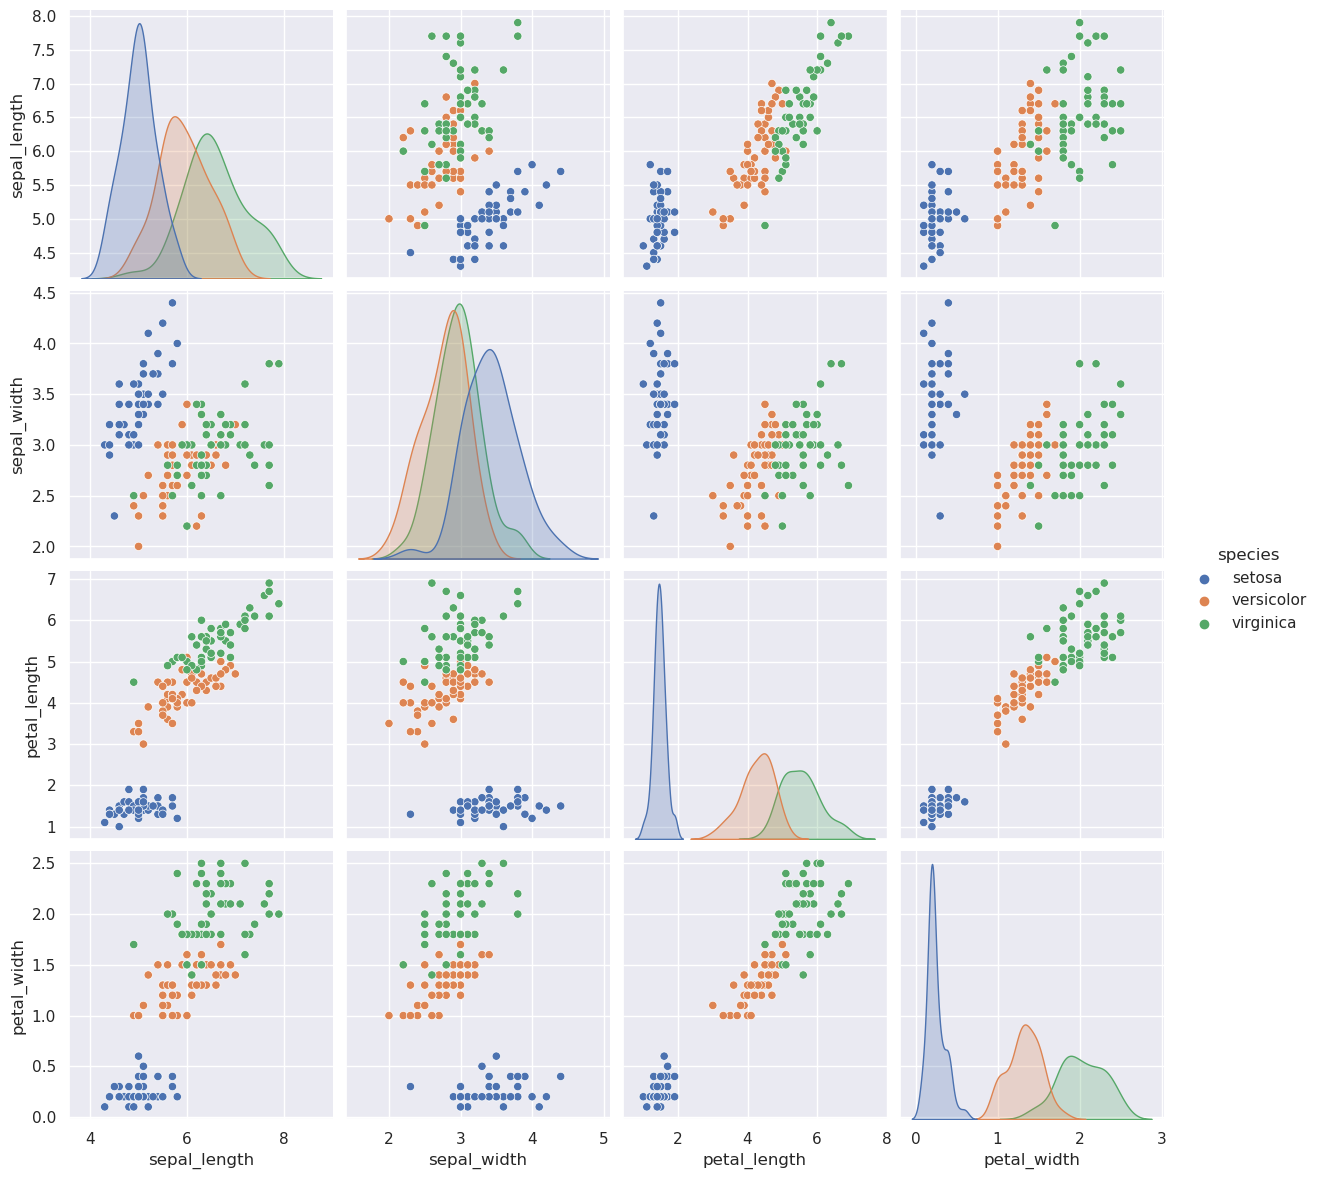

In [4]:
""" Seaborn's pairplot = Plot pairwise relationships in a dataset => visualization tool
    It creates a grid of scatterplots and histograms, where each column and row corresponds to a different variable, and the cells in the grid show the scatterplot of the corresponding pair of variables.
    In the grid of Axes each numeric variable in ``data`` will by shared across the y-axes across a single row and the x-axes across a single column. 
    The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
"""

%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=3); 

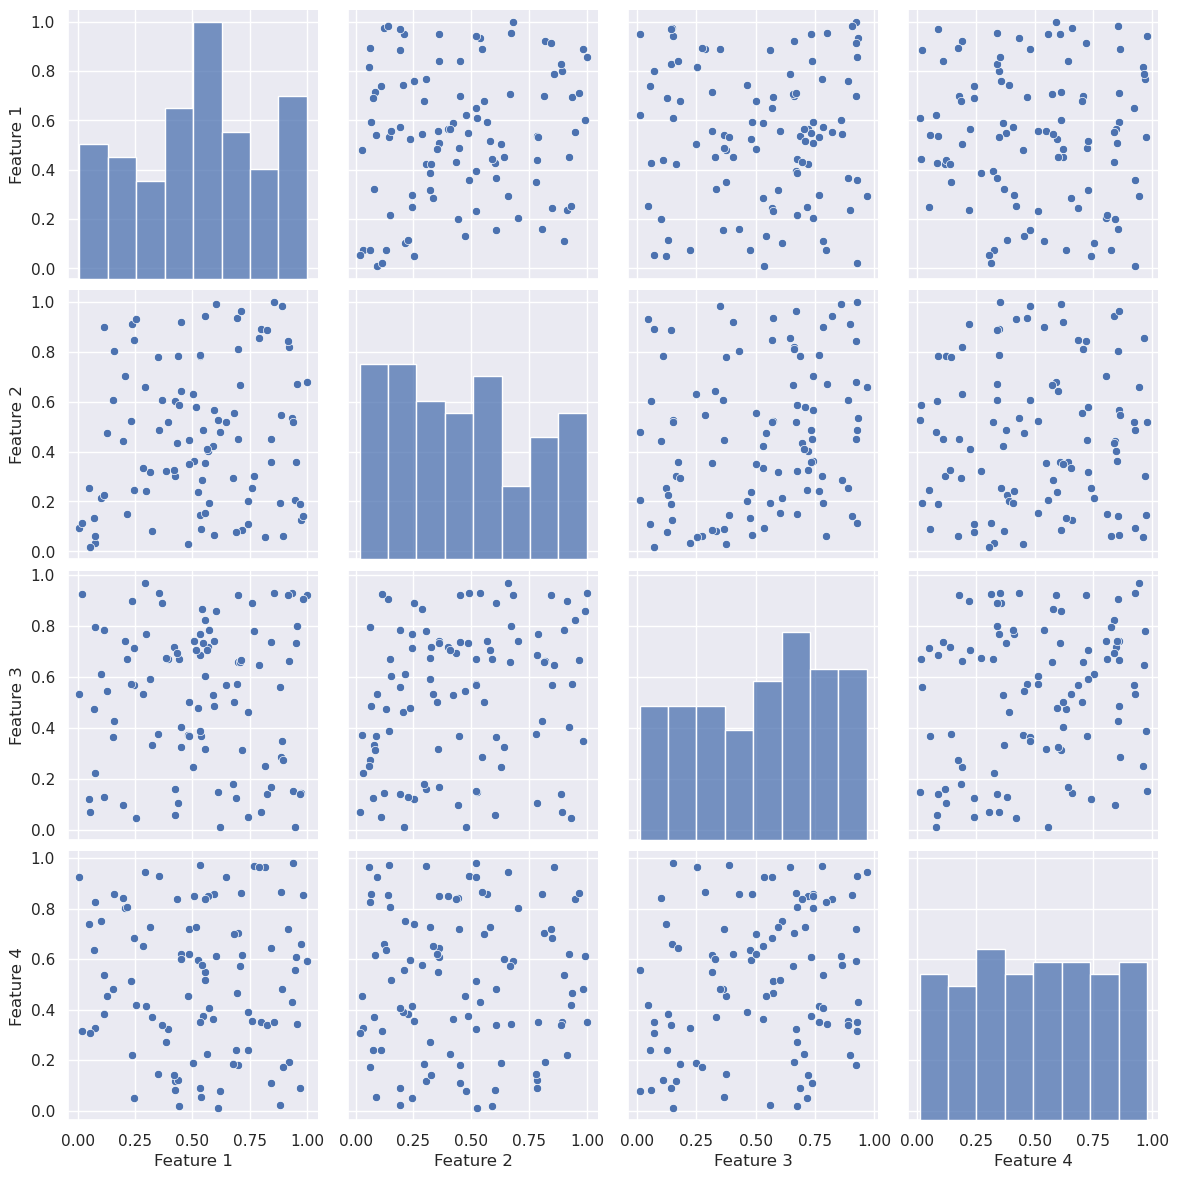

In [7]:
data = pd.DataFrame(np.random.rand(100, 4), columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
sns.pairplot(data, height=3)

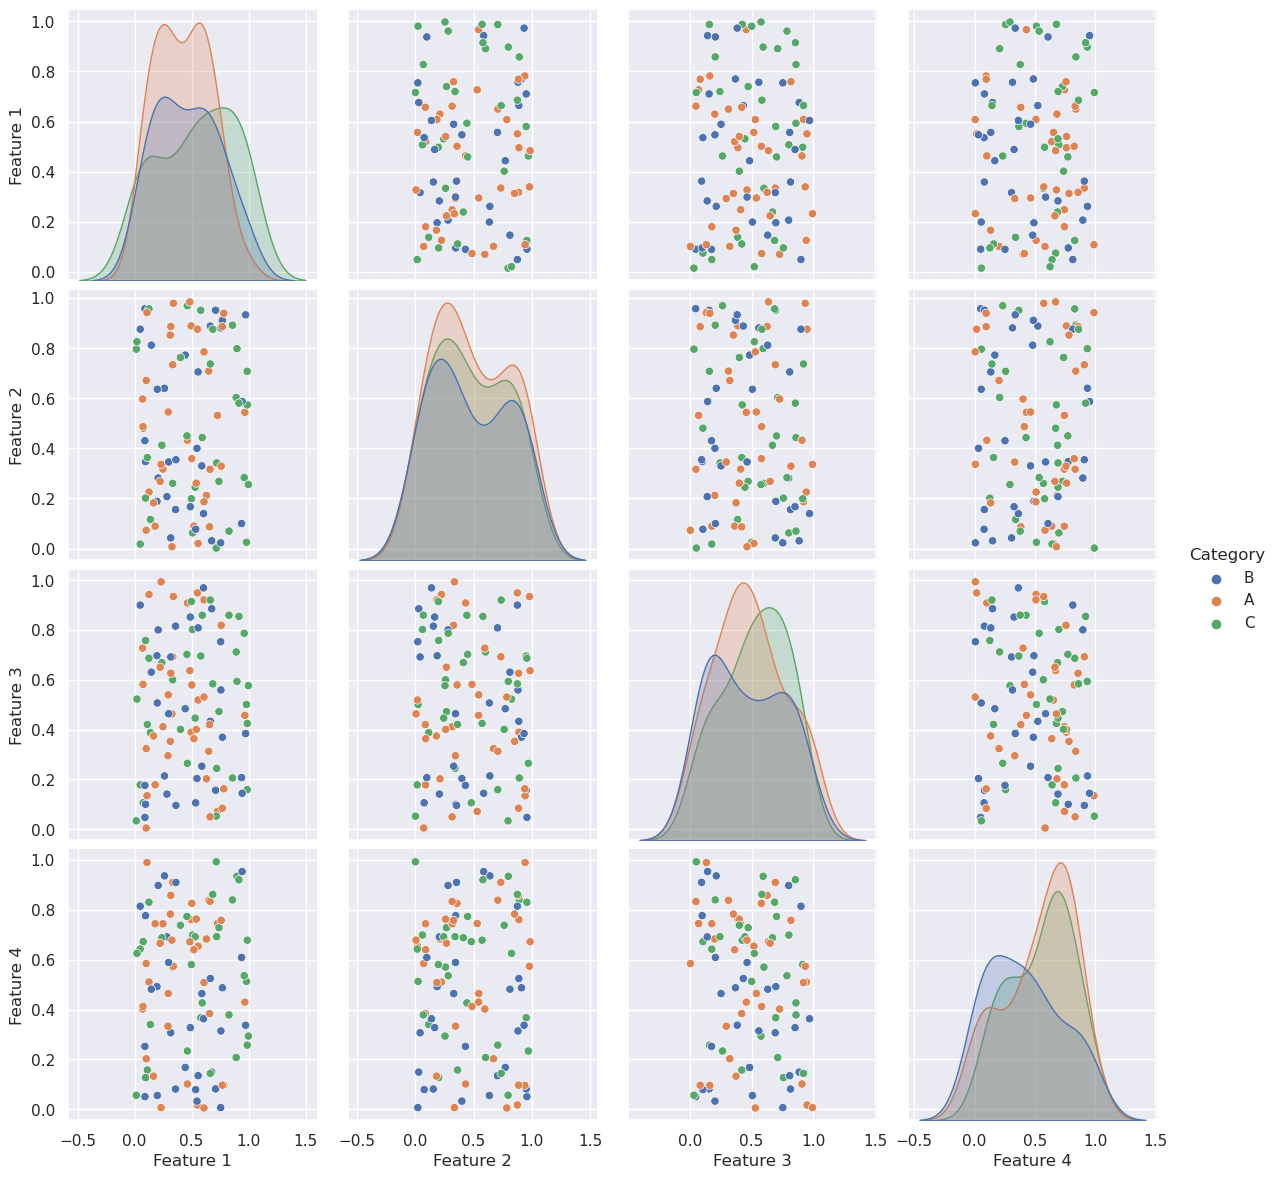

In [8]:
###### Load a custom dataset with a categorical variable
data = pd.DataFrame({
    'Feature 1': np.random.rand(100),
    'Feature 2': np.random.rand(100),
    'Feature 3': np.random.rand(100),
    'Feature 4': np.random.rand(100),
    'Category': np.random.choice(['A', 'B', 'C'], size=100)
})

# Create a pairplot with hue
sns.pairplot(data, hue='Category', height=3)

### Example 2: various plots

In [ ]:
# Load a built-in dataset
tips = sns.load_dataset("tips")

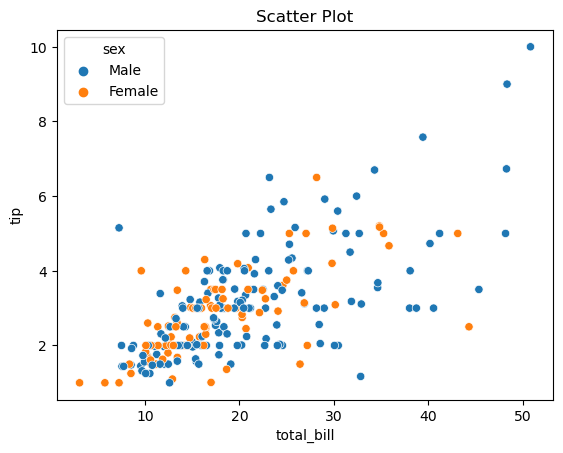

In [4]:
""" Scatter plot """
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
plt.title("Scatter Plot")
plt.show()

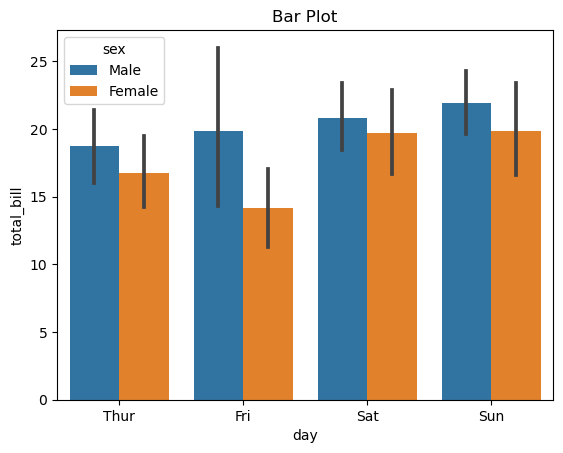

In [5]:
""" Bar plot """
sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Bar Plot")
plt.show()

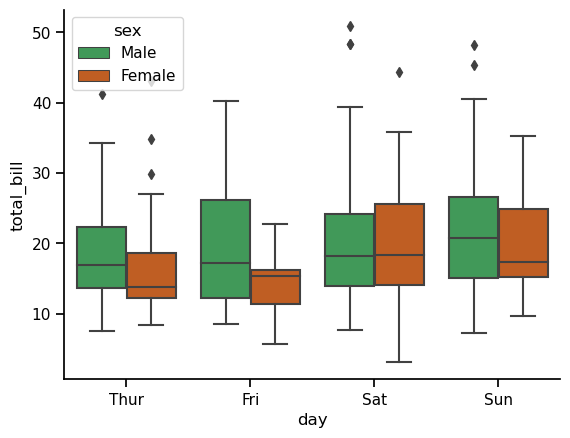

In [20]:
""" Boxplot """
# Display plot without matplotlib, but the title cannot be insterted with sns
# Define a custom hexadecimal color palette 
custom_palette = ["#32A852", "#D95809"]  

# Set Seaborn to use IPython integration
sns.set_context("notebook")

# Create a box plot with the custom color palette
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", palette=custom_palette)
# Remove the top and right spines (axes lines) from plot
sns.despine()

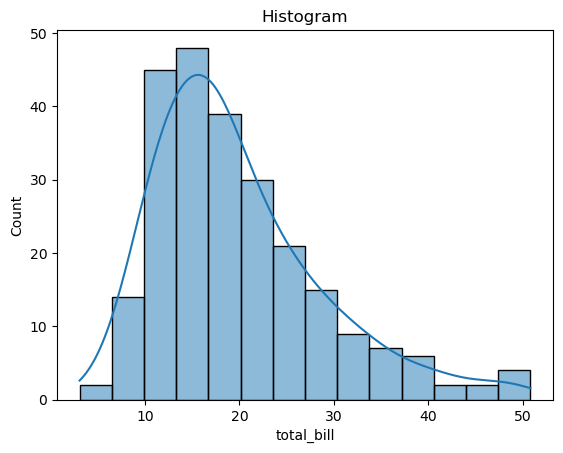

In [7]:
""" Histogram """
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title("Histogram")
plt.show()

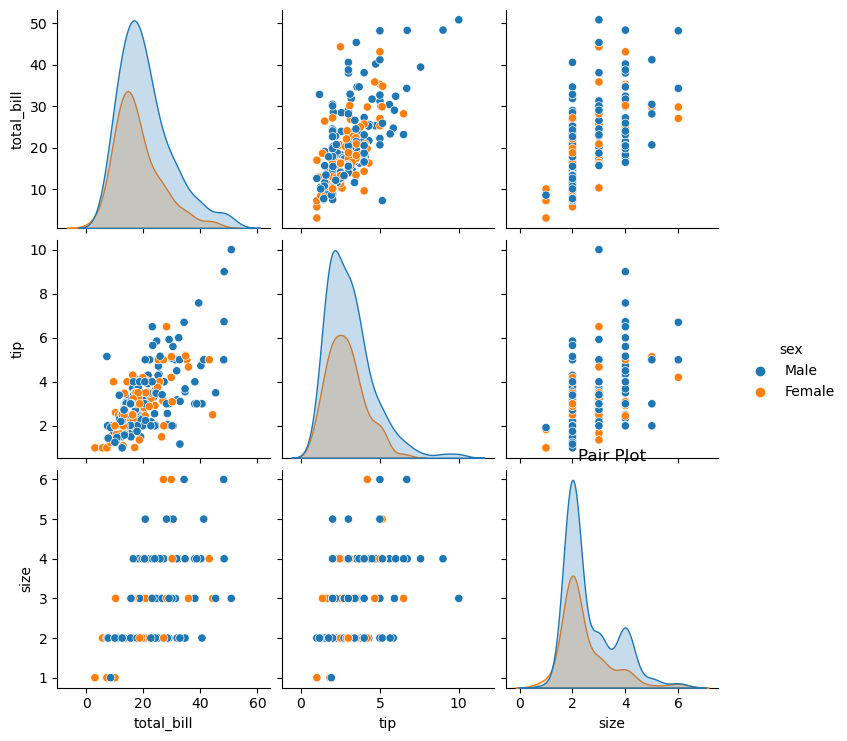

In [8]:
""" Pair plot """
sns.pairplot(data=tips, hue="sex")
plt.title("Pair Plot")
plt.show()

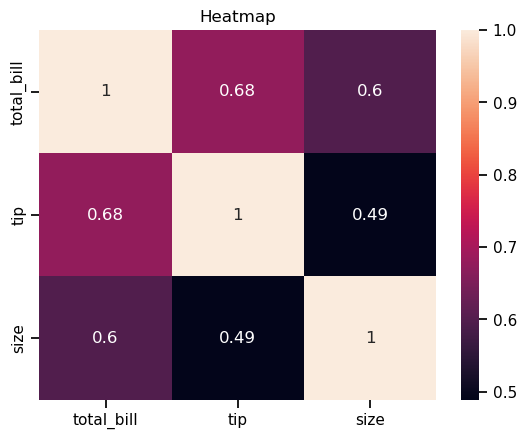

In [21]:
""" Heatmap """
correlation_matrix = tips.corr(numeric_only=True) #set numeric_only to True explicitly to avoid FutureWarning
sns.heatmap(correlation_matrix, annot=True)
plt.title("Heatmap")
plt.show()